In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [5]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
print(X.shape, y.shape)

(1500, 2) (1500,)


In [8]:
# Incorrect number of clusters
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)


Text(0.5, 1.0, 'Incorrect Number of Blobs')

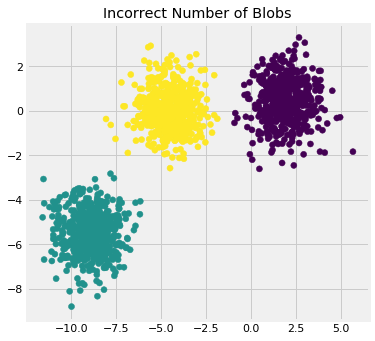

In [9]:
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)


In [1]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

In [3]:
iris = load_iris()
X = iris.data
print(X.shape)

(150, 4)


In [4]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)


In [19]:
counts = np.zeros(model.children_.shape[0])
n_samples = len(model.labels_)
model.labels_
print(model.children_.shape)
model.children_

(149, 2)


array([[101, 142],
       [  7,  39],
       [  0,  17],
       [  9,  34],
       [128, 132],
       [ 10,  48],
       [  4,  37],
       [ 19,  21],
       [ 29,  30],
       [ 57,  93],
       [ 80,  81],
       [116, 137],
       [  8,  38],
       [  3,  47],
       [ 27,  28],
       [ 82,  92],
       [ 95,  96],
       [127, 138],
       [  1,  45],
       [ 63,  91],
       [ 65,  75],
       [ 40, 152],
       [123, 126],
       [ 49, 151],
       [112, 139],
       [ 94,  99],
       [ 12, 168],
       [ 88, 166],
       [ 66,  84],
       [ 23,  26],
       [ 53,  89],
       [ 74,  97],
       [ 25, 153],
       [ 46, 157],
       [  2, 163],
       [110, 147],
       [120, 143],
       [136, 148],
       [ 78, 169],
       [ 69, 160],
       [ 54,  58],
       [140, 144],
       [141, 145],
       [ 43, 179],
       [ 68,  87],
       [ 50,  52],
       [ 51,  56],
       [107, 130],
       [105, 122],
       [103, 161],
       [164, 171],
       [ 20,  31],
       [ 11,

In [20]:
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)


In [39]:
min(model.children_[:,1])

15

In [28]:
model.distances_.shape

(149,)

In [21]:
linkage_matrix.shape

(149, 4)

In [22]:
linkage_matrix[0]

array([101., 142.,   0.,   2.])

In [24]:
print(len(counts)) 
counts

149


array([  2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
         2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   3.,
         2.,   3.,   2.,   2.,   3.,   3.,   2.,   2.,   2.,   2.,   3.,
         3.,   3.,   2.,   2.,   2.,   3.,   3.,   2.,   2.,   2.,   3.,
         2.,   2.,   2.,   2.,   2.,   3.,   5.,   2.,   3.,   3.,   3.,
         3.,   3.,   4.,   8.,   2.,   6.,   3.,   3.,   2.,   2.,   4.,
         5.,   2.,   2.,   3.,   4.,   4.,   3.,   4.,   3.,   3.,   3.,
         2.,  10.,   3.,   2.,   5.,   4.,   3.,   4.,   7.,   2.,   3.,
         3.,   4.,   4.,   5.,   3.,   4.,   4.,   5.,   3.,   2.,   4.,
         6.,   6.,   5.,   4.,   4.,   6.,   8.,   5.,   4.,   8.,   3.,
         4.,   4.,   9.,   8.,   8.,   7.,   2.,  15.,   7.,   8.,   5.,
         8.,  17.,  12.,   7.,   7.,   9.,   6.,   4.,  10.,  12.,  10.,
        21.,  15.,  15.,   7.,  15.,  24.,  12.,  22.,  29.,  23.,  26.,
        38.,  50.,  36.,  64., 100., 150.])

In [47]:
print(np.sort(model.children_[:,0]))
print(np.sort(model.children_[:,0]-n_samples))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  19  20
  22  23  24  25  27  29  32  35  36  40  41  42  43  44  46  49  50  51
  53  54  55  57  59  60  61  62  63  64  65  66  67  68  69  70  72  73
  74  76  77  78  80  82  83  85  86  88  94  95  98 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 123
 124 125 127 128 134 136 140 141 146 149 156 164 170 173 174 175 176 178
 180 181 191 193 197 201 207 211 214 216 217 220 221 222 228 230 231 235
 236 238 240 246 251 252 253 256 257 259 263 264 267 271 272 273 276 282
 286 287 292 294 295]
[-150 -149 -148 -147 -146 -145 -144 -143 -142 -141 -140 -139 -138 -137
 -136 -134 -131 -130 -128 -127 -126 -125 -123 -121 -118 -115 -114 -110
 -109 -108 -107 -106 -104 -101 -100  -99  -97  -96  -95  -93  -91  -90
  -89  -88  -87  -86  -85  -84  -83  -82  -81  -80  -78  -77  -76  -74
  -73  -72  -70  -68  -67  -65  -64  -62  -56  -55  -52  -50  -49  -48
  -47  -46  -45  -44  -43  -42  -41  -4

In [48]:
print(np.sort(model.children_[:,1]))
print(np.sort(model.children_[:,1]-n_samples))

[ 15  17  18  21  26  28  30  31  33  34  37  38  39  45  47  48  52  56
  58  71  75  79  81  84  87  89  90  91  92  93  96  97  99 122 126 129
 130 131 132 133 135 137 138 139 142 143 144 145 147 148 150 151 152 153
 154 155 157 158 159 160 161 162 163 165 166 167 168 169 171 172 177 179
 182 183 184 185 186 187 188 189 190 192 194 195 196 198 199 200 202 203
 204 205 206 208 209 210 212 213 215 218 219 223 224 225 226 227 229 232
 233 234 237 239 241 242 243 244 245 247 248 249 250 254 255 258 260 261
 262 265 266 268 269 270 274 275 277 278 279 280 281 283 284 285 288 289
 290 291 293 296 297]
[-135 -133 -132 -129 -124 -122 -120 -119 -117 -116 -113 -112 -111 -105
 -103 -102  -98  -94  -92  -79  -75  -71  -69  -66  -63  -61  -60  -59
  -58  -57  -54  -53  -51  -28  -24  -21  -20  -19  -18  -17  -15  -13
  -12  -11   -8   -7   -6   -5   -3   -2    0    1    2    3    4    5
    7    8    9   10   11   12   13   15   16   17   18   19   21   22
   27   29   32   33   34   35   36   3

In [50]:
 linkage_matrix[-5:,:]

array([[282.        , 290.        ,   3.82805262,  50.        ],
       [287.        , 288.        ,   4.84770851,  36.        ],
       [292.        , 293.        ,   6.39940682,  64.        ],
       [295.        , 296.        ,  12.30039605, 100.        ],
       [294.        , 297.        ,  32.447607  , 150.        ]])

In [51]:
counts

array([  2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
         2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   3.,
         2.,   3.,   2.,   2.,   3.,   3.,   2.,   2.,   2.,   2.,   3.,
         3.,   3.,   2.,   2.,   2.,   3.,   3.,   2.,   2.,   2.,   3.,
         2.,   2.,   2.,   2.,   2.,   3.,   5.,   2.,   3.,   3.,   3.,
         3.,   3.,   4.,   8.,   2.,   6.,   3.,   3.,   2.,   2.,   4.,
         5.,   2.,   2.,   3.,   4.,   4.,   3.,   4.,   3.,   3.,   3.,
         2.,  10.,   3.,   2.,   5.,   4.,   3.,   4.,   7.,   2.,   3.,
         3.,   4.,   4.,   5.,   3.,   4.,   4.,   5.,   3.,   2.,   4.,
         6.,   6.,   5.,   4.,   4.,   6.,   8.,   5.,   4.,   8.,   3.,
         4.,   4.,   9.,   8.,   8.,   7.,   2.,  15.,   7.,   8.,   5.,
         8.,  17.,  12.,   7.,   7.,   9.,   6.,   4.,  10.,  12.,  10.,
        21.,  15.,  15.,   7.,  15.,  24.,  12.,  22.,  29.,  23.,  26.,
        38.,  50.,  36.,  64., 100., 150.])

In [60]:
counts = np.zeros(model.children_.shape[0])
n_samples = len(model.labels_)
for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count


linkage_matrix = np.column_stack([model.children_, model.distances_*1, counts]).astype(float)


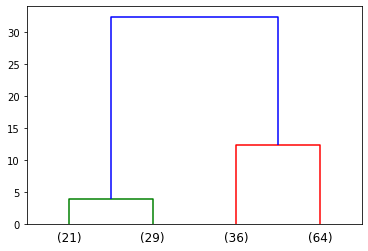

In [63]:
dendrogram(linkage_matrix, truncate_mode='level', p=1)
plt.show()

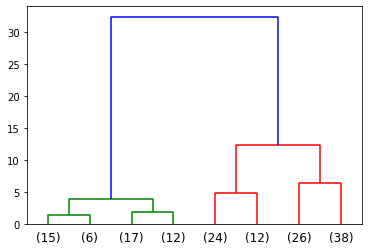

In [57]:
dendrogram(linkage_matrix, truncate_mode='level', p=2)
plt.show()